In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

In [2]:
# target predict same

In [3]:
df = pd.read_csv('ds_salaries.csv')
pd.set_option('display.max_columns',None) # показываем все колонки
df.head(5)

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
columns_namess = df.columns
print(columns_namess)

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [5]:
df=df.drop(columns='id')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [6]:
df.shape

(607, 11)

In [7]:
df.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00
mean,2021.41,324000.06,112297.87,70.92
std,0.69,1544357.49,70957.26,40.71
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,70000.00,62726.00,50.00
50%,2022.00,115000.00,101570.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [8]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [10]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df=df.drop('salary_currency',axis=1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,150000,US,100,US,M


In [12]:
df=df.drop('salary',axis=1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [13]:
df['remote_ratio'].mean()


70.92257001647447

In [14]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M


In [15]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [16]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [17]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [18]:
df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [19]:
quantity_emploee_residence = df['employee_residence'].value_counts()
quantity_emploee_residence

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: count, dtype: int64

In [20]:
df['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [21]:
quantity_company_location = df['company_location'].value_counts()
quantity_company_location

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [22]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [23]:
value_counts = df['company_size'].value_counts()
value_counts

company_size
M    326
L    198
S     83
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18ef09d5b90>,
 [Text(-0.1278068772673044, 1.0925499540630534, 'M'),
  Text(-0.33883566866423465, -1.0465134445581008, 'L'),
  Text(1.0000569882359693, -0.4581331905465946, 'S')],
 [Text(-0.06971284214580238, 0.5959363385798473, '53.7%'),
  Text(-0.18481945563503704, -0.5708255152135094, '32.6%'),
  Text(0.5454856299468923, -0.24989083120723338, '13.7%')])

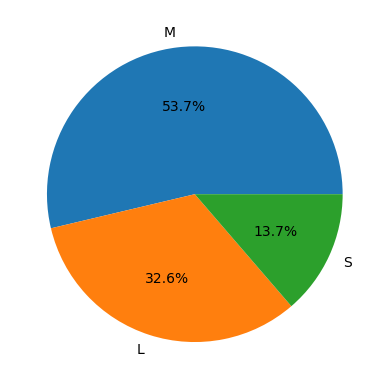

In [24]:
plt.pie(df['company_size'].value_counts(), labels=['M', 'L', 'S'], autopct='%1.1f%%')

In [25]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

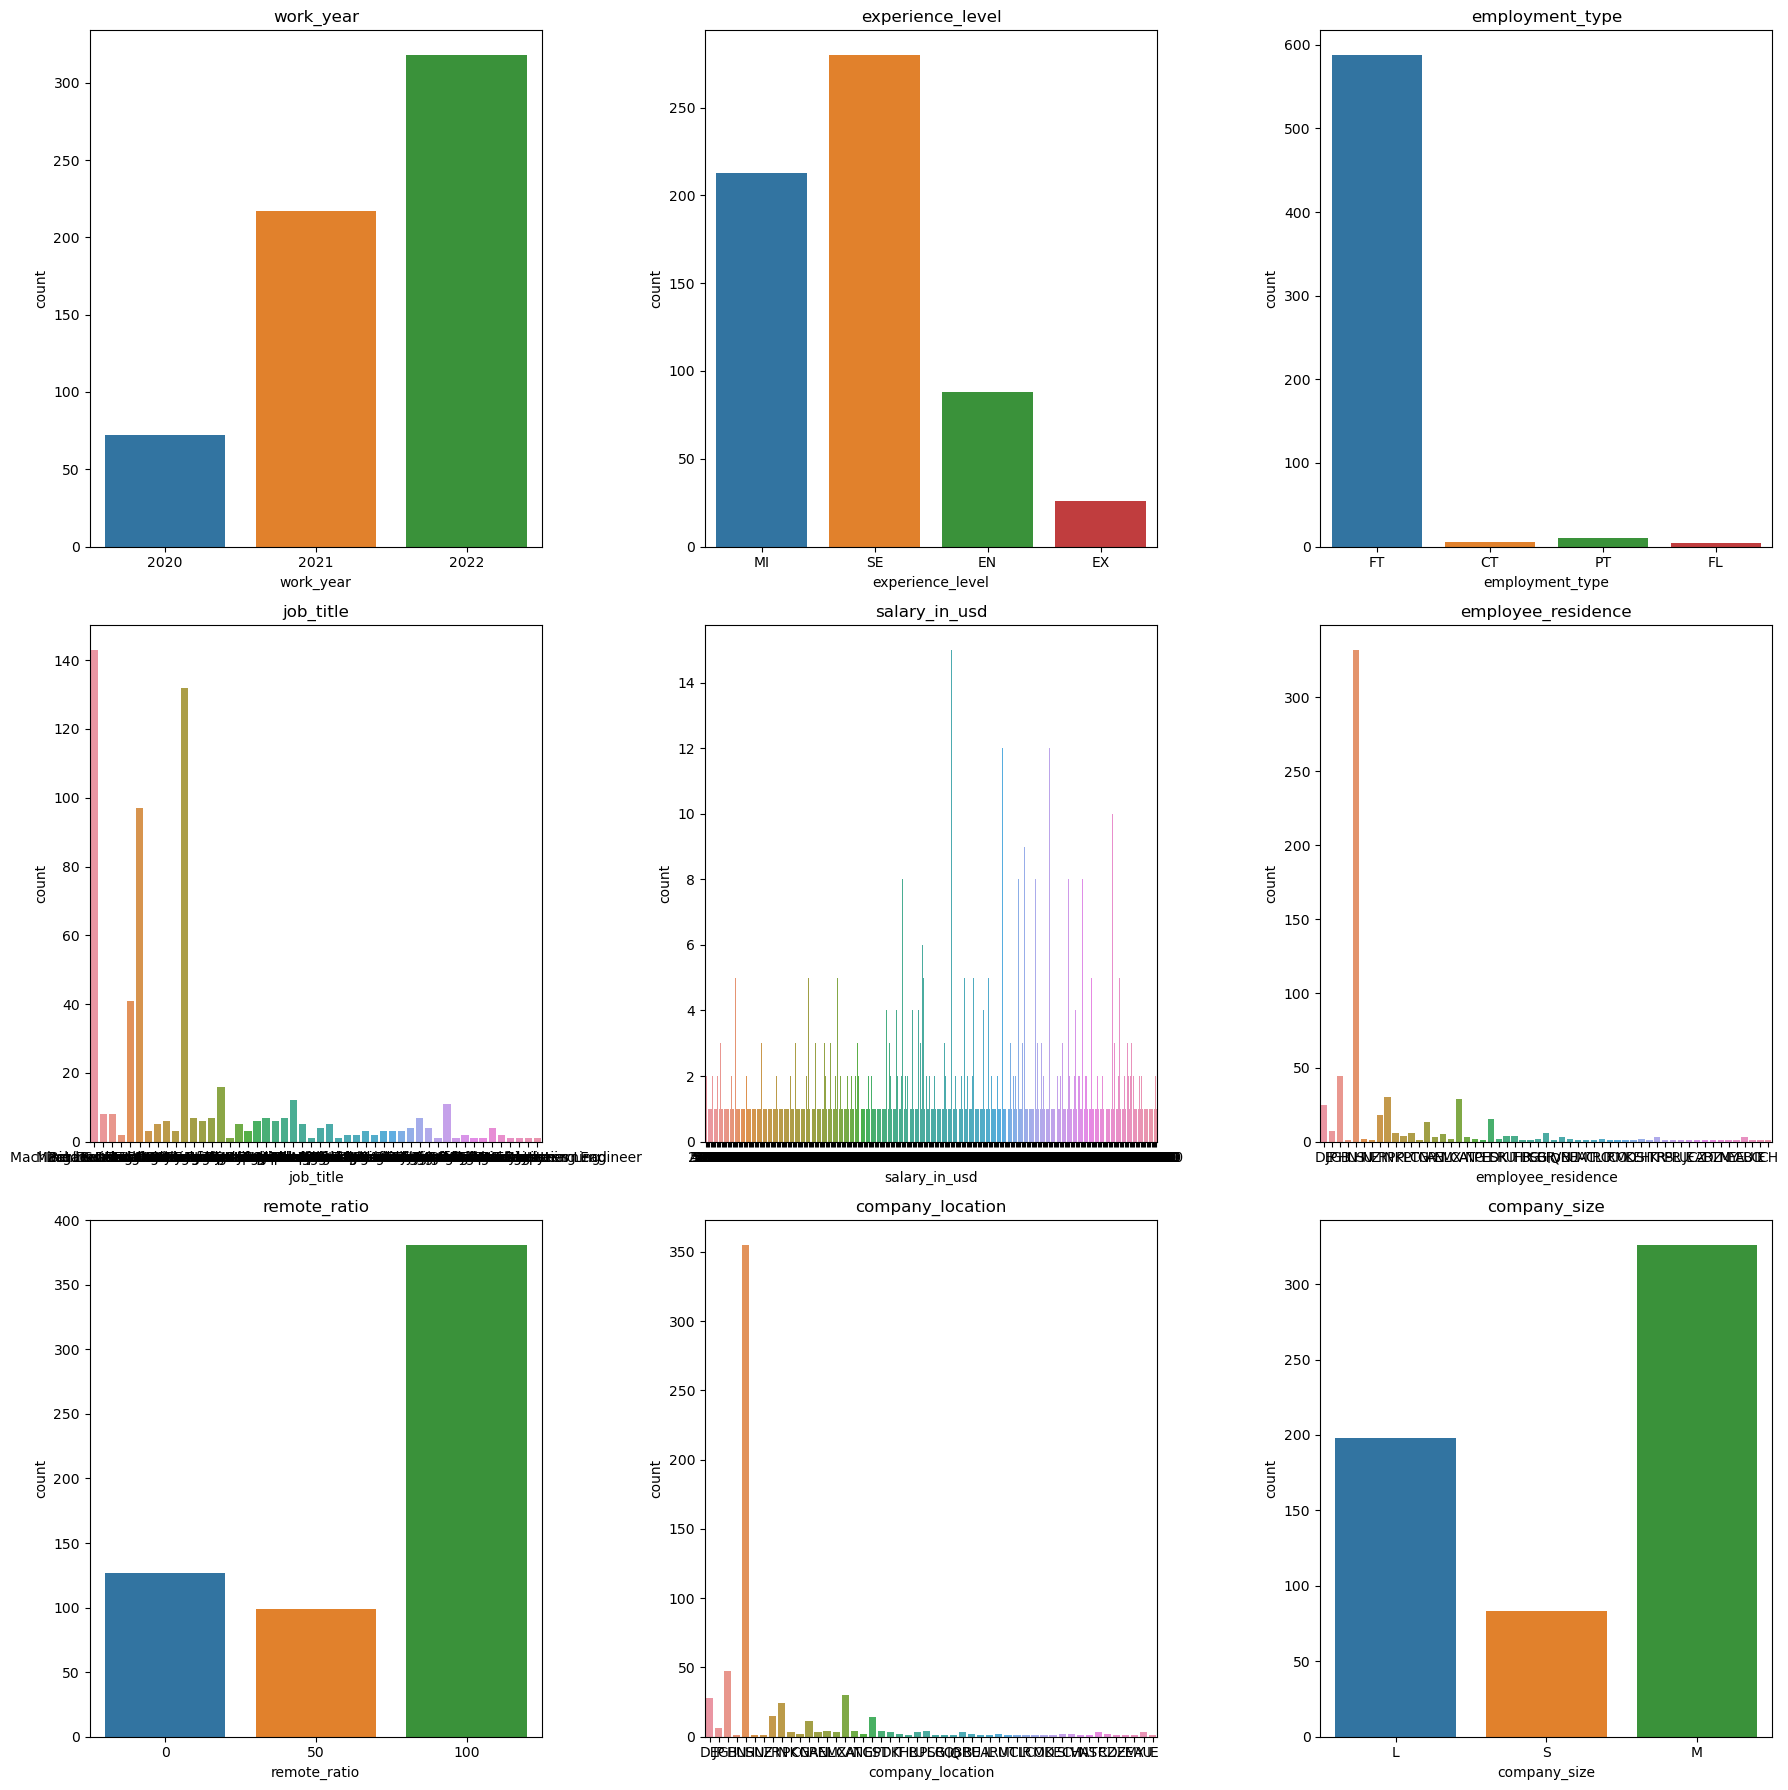

In [26]:
columnses = ['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size']
plt.figure(figsize=(18,18))

for i,col in enumerate(columnses):
    plt.subplot(3, 3, i+1)  
    sns.countplot(x=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

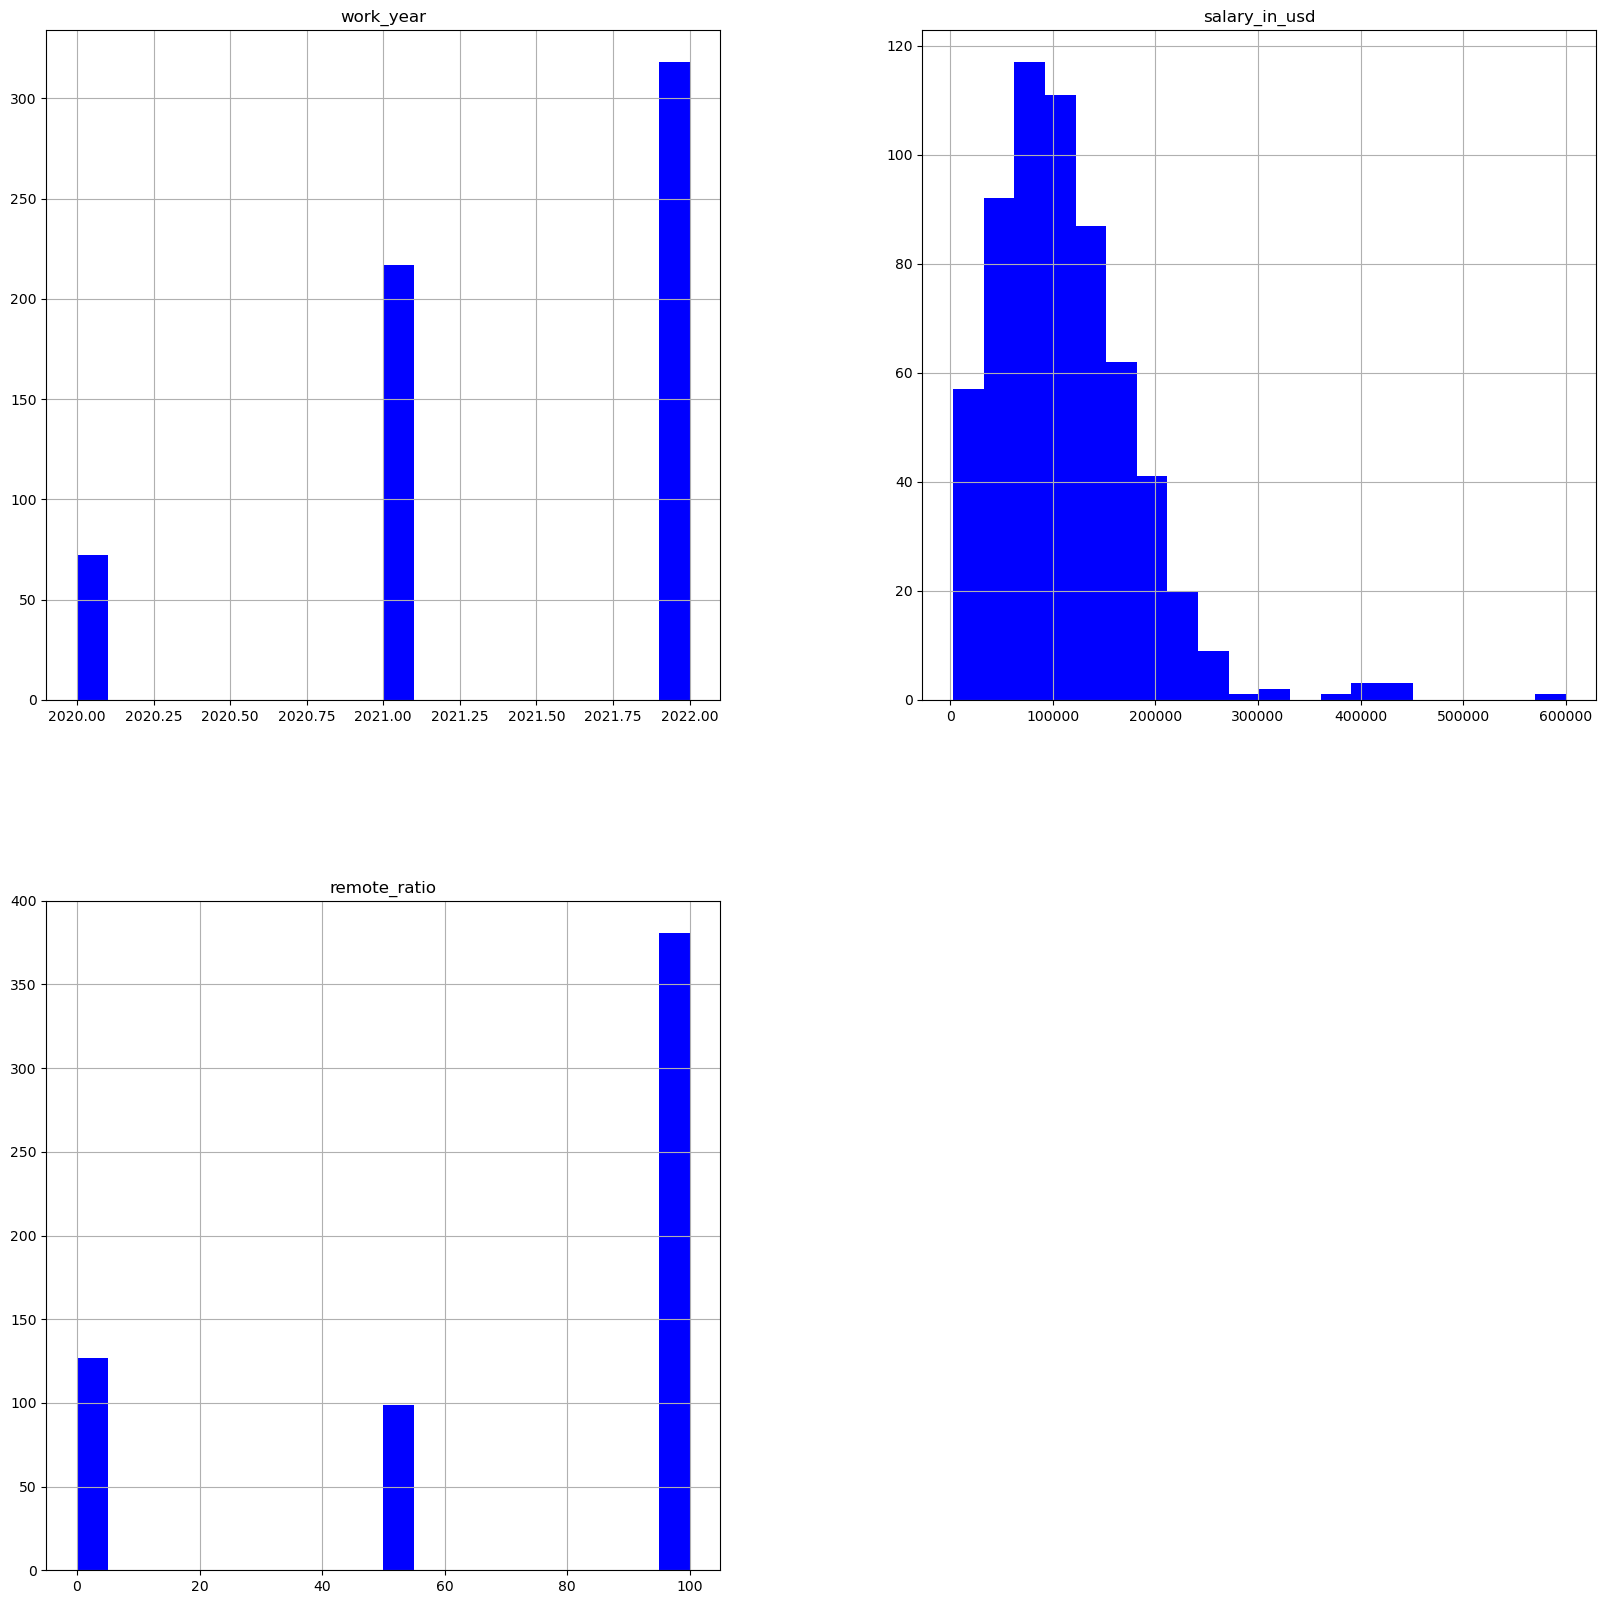

In [27]:
df.hist(bins=20,figsize=(20,20),color='blue')
plt.show

## I try coding str. columns


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').drop(columns="job_title").columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()  

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,Data Scientist,79833,14,0,12,0
1,2020,3,2,Machine Learning Scientist,260000,32,0,29,2
2,2020,3,2,Big Data Engineer,109024,20,50,18,1
3,2020,2,2,Product Data Analyst,20000,23,0,20,2
4,2020,3,2,Machine Learning Engineer,150000,55,50,48,0


In [29]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,Data Scientist,79833,14,0,12,0
1,2020,3,2,Machine Learning Scientist,260000,32,0,29,2
2,2020,3,2,Big Data Engineer,109024,20,50,18,1


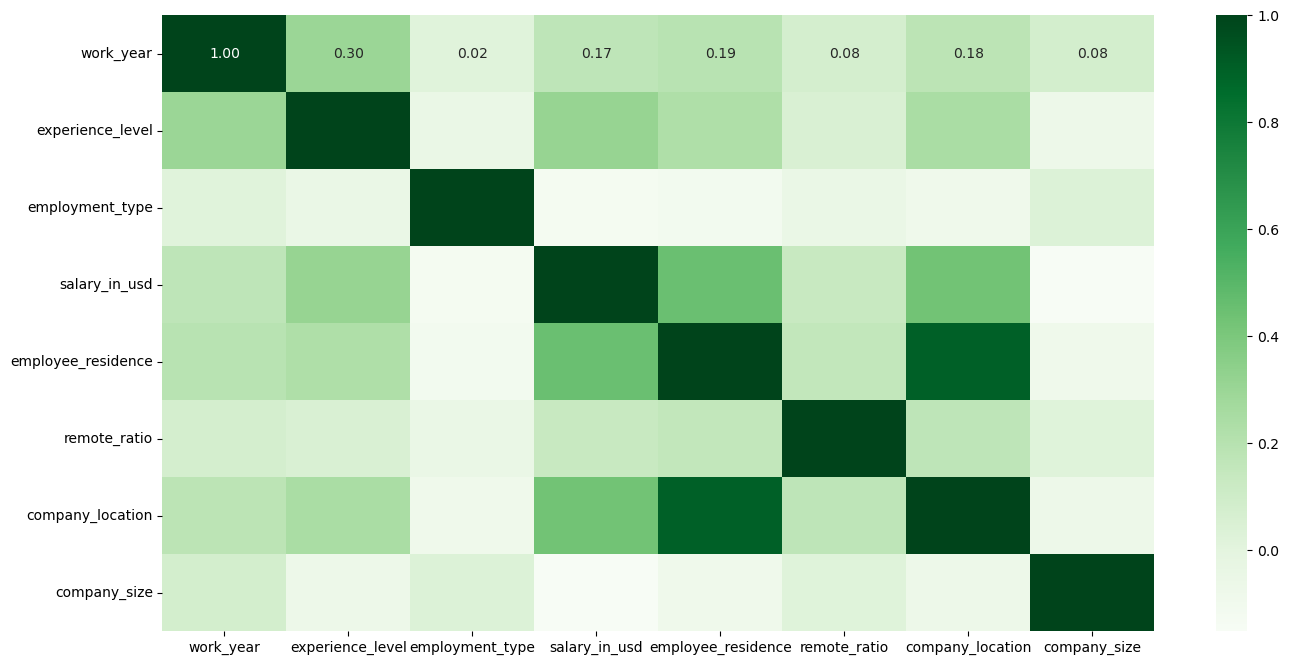

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(df.drop(columns='job_title').corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [31]:
df.drop(columns='job_title').corr()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
salary_in_usd,0.170493,0.315312,-0.123545,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,0.428994,0.897704,0.169083,1.000000,-0.066554
company_size,0.078764,-0.066423,0.034549,-0.151205,-0.081742,0.022070,-0.066554,1.000000


In [33]:
df.dtypes

work_year              int64
experience_level       int32
employment_type        int32
job_title             object
salary_in_usd          int64
employee_residence     int32
remote_ratio           int64
company_location       int32
company_size           int32
dtype: object

In [34]:
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\User
